In [185]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io

In [99]:
df=pd.read_csv('/content/deliveries.csv')
df.head(5)
#indepth analysis of DA warners performance

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
filt=df['batsman']=='DA Warner'
df_warner=df[filt]
df_warner.shape

(462, 21)

<Axes: ylabel='dismissal_kind'>

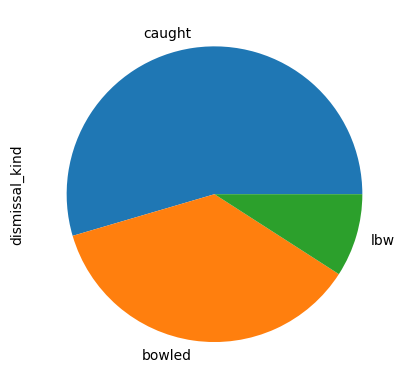

In [ ]:
df_warner['dismissal_kind'].value_counts().plot.pie()

In [ ]:
len(df_warner[df_warner['batsman_runs']==4])

63

In [ ]:
len(df_warner[df_warner['batsman_runs']==6])

26

In [ ]:
def count(df,runs):
  return len(df_warner[df_warner['batsman_runs']==runs])*runs
  #this will give the run count for 1,2,3,4,6 made by warner

In [ ]:
count(df_warner,1)

167

In [ ]:
count(df_warner,2)

60

In [ ]:
count(df_warner,3)

6

In [ ]:
count(df_warner,4)

252

In [ ]:
count(df_warner,6)

156

([<matplotlib.patches.Wedge at 0x7ed16fd697b0>,
 [Text(0.7516645919268177, 0.8031191326593402, '1'),
  Text(-0.38773777886150684, 1.0293975980366117, '2'),
  Text(-0.6948328933676353, 0.8527644752769433, '3'),
  Text(-1.1155585156099055, -0.4421868363601797, '4'),
  Text(0.7938491266038632, -0.7614483332375769, '6')],
 [Text(0.40999886832371873, 0.4380649814505492, '26.1%'),
  Text(-0.21149333392445827, 0.5614895989290608, '9.4%'),
  Text(-0.3789997600187101, 0.465144259241969, '0.9%'),
  Text(-0.6507424674391115, -0.2579423212101048, '39.3%'),
  Text(0.43300861451119804, -0.4153354544932237, '24.3%')])

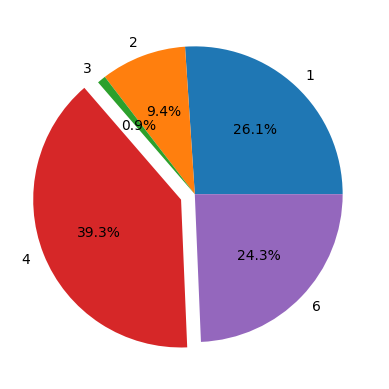

In [ ]:
slices=[167,60,6,252,156]
labels=[1,2,3,4,6]
explode=[0,0,0,0.1,0]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)
#explode is being used to highlite the most run in the plot, autopct is used to convert text data to percentage


In [100]:
#performance analysis of batsman
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [101]:
Teams={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Mumbai I':'MI'

}
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)
Teams

{'Royal Challengers Bangalore': 'RCB',
 'Sunrisers Hyderabad': 'SRH',
 'Rising Pune Supergiant': 'RPS',
 'Mumbai Indians': 'MI',
 'Kolkata Knight Riders': 'KKR',
 'Gujarat Lions': 'GL',
 'Kings XI Punjab': 'KP',
 'Delhi Daredevils': 'DD',
 'Chennai Super Kings': 'CSK',
 'Rajasthan Royals': 'RR',
 'Deccan Chargers': 'DC',
 'Mumbai I': 'MI'}

In [102]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,RCB,SRH,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,RCB,SRH,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,RCB,SRH,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,RCB,SRH,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [60]:
#to group data and check total runs
runs=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop ('match_id',axis=1,inplace=True)#to drop match id and update
runs

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183
...,...,...,...
1206,2,KKR,140
1207,1,GL,162
1208,2,SRH,163
1209,1,SRH,208


In [61]:
inning1=runs[runs['inning']==1]
inning1

,inning,batting_team,total_runs
0,1,SRH,207
2,1,MI,184
4,1,GL,183
6,1,RPS,163
8,1,RCB,157
...,...,...,...
1201,1,DD,138
1203,1,GL,158
1205,1,SRH,162
1207,1,GL,162


In [62]:
inning2=runs[runs['inning']==2]
inning2

,inning,batting_team,total_runs
1,2,RCB,172
3,2,RPS,187
5,2,KKR,184
7,2,KP,164
9,2,DD,142
...,...,...,...
1202,2,RCB,139
1204,2,RCB,159
1206,2,KKR,140
1208,2,SRH,163


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'SRH'),
  Text(1, 0, 'MI'),
  Text(2, 0, 'GL'),
  Text(3, 0, 'RPS'),
  Text(4, 0, 'RCB'),
  Text(5, 0, 'KKR'),
  Text(6, 0, 'DD'),
  Text(7, 0, 'KP'),
  Text(8, 0, 'CSK'),
  Text(9, 0, 'RR'),
  Text(10, 0, 'DC')])

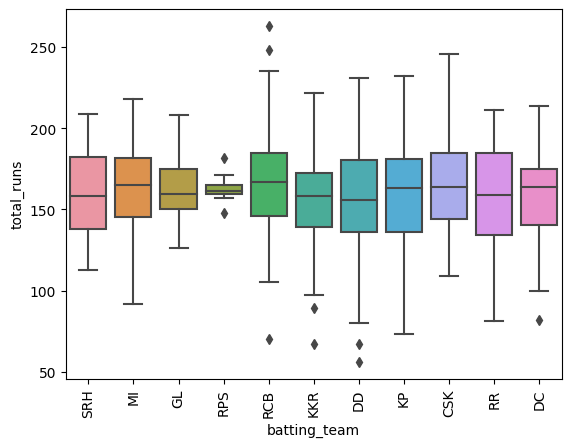

In [63]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'RCB'),
  Text(1, 0, 'RPS'),
  Text(2, 0, 'KKR'),
  Text(3, 0, 'KP'),
  Text(4, 0, 'DD'),
  Text(5, 0, 'SRH'),
  Text(6, 0, 'MI'),
  Text(7, 0, 'GL'),
  Text(8, 0, 'RR'),
  Text(9, 0, 'CSK'),
  Text(10, 0, 'DC')])

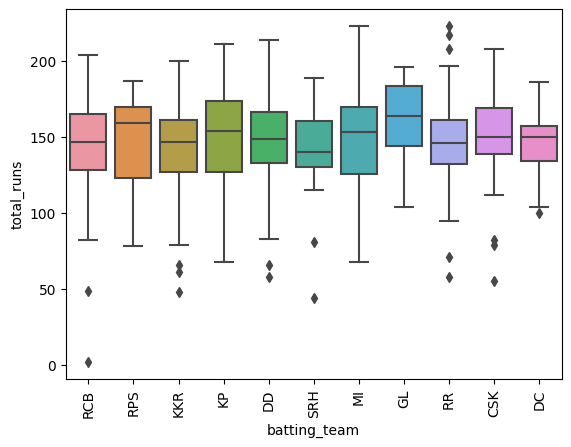

In [70]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)
plt.xticks(rotation='vertical')#to plot graph btwn total runs and batting teams n to find outliers

In [73]:
high_score=df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_score

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1134,634,2,KKR,SRH,140
1135,635,1,GL,SRH,162
1136,635,2,SRH,GL,163
1137,636,1,SRH,RCB,208


In [74]:
score_200=high_score[high_score['total_runs']>=200]#inside dataframe is written as we r taking column from that and operating and outer data frame is to fetch the row
score_200


,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1111,620,1,RCB,GL,248
1115,623,1,MI,DD,206
1119,626,1,RCB,KP,211
1137,636,1,SRH,RCB,208


<Axes: xlabel='batting_team', ylabel='count'>

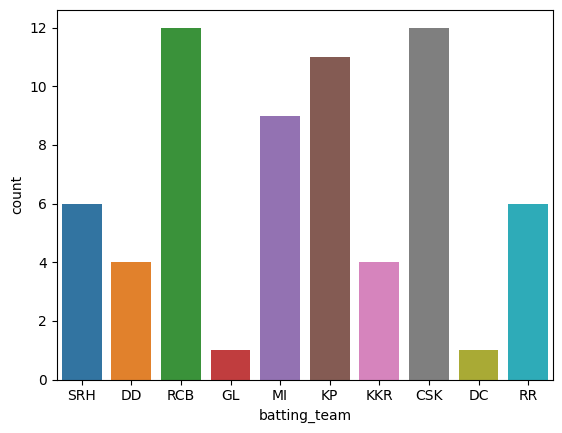

In [82]:
sns.countplot(x=score_200['batting_team'])# the plot shows no of times the batting team scored above 200 with rcb at peak

<Axes: xlabel='bowling_team', ylabel='count'>

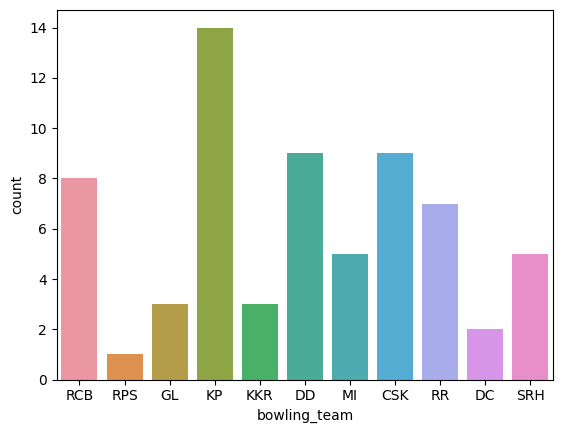

In [83]:
sns.countplot(x=score_200['bowling_team'])

In [4]:
#batman comparison i will find out the no of ball by each batsman and save it in balls dataframe
balls=df.groupby('batsman')['ball'].count().reset_index()
balls

,batsman,ball
0,A Chopra,75
1,A Choudhary,20
2,A Flintoff,57
3,A Kumble,36
4,A Mishra,118
...,...,...
299,YV Takawale,91
300,Yashpal Singh,67
301,Younis Khan,7
302,Yuvraj Singh,696


In [6]:
#I need summation of total runs made by each batsman
runs=df.groupby('batsman')['batsman_runs'].sum().reset_index()
runs

,batsman,batsman_runs
0,A Chopra,53.0
1,A Choudhary,25.0
2,A Flintoff,62.0
3,A Kumble,28.0
4,A Mishra,112.0
...,...,...
299,YV Takawale,88.0
300,Yashpal Singh,47.0
301,Younis Khan,3.0
302,Yuvraj Singh,891.0


In [11]:
#now we have to create framework to find the total 4 and 6 hits by each batsman.
four= df[df['batsman_runs']== 4]
four

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
8,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,2.0,DA Warner,S Dhawan,A Choudhary,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
13,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,7.0,MC Henriques,S Dhawan,A Choudhary,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
30,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,5.0,5.0,MC Henriques,S Dhawan,S Aravind,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
32,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,6.0,1.0,S Dhawan,MC Henriques,SR Watson,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40853,174,2.0,Royal Challengers Bangalore,Deccan Chargers,3.0,6.0,JH Kallis,MK Pandey,RJ Harris,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
40856,174,2.0,Royal Challengers Bangalore,Deccan Chargers,4.0,2.0,JH Kallis,MK Pandey,RP Singh,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
40885,174,2.0,Royal Challengers Bangalore,Deccan Chargers,9.0,1.0,RE van der Merwe,R Dravid,PP Ojha,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
40892,174,2.0,Royal Challengers Bangalore,Deccan Chargers,10.0,2.0,LRPL Taylor,R Dravid,Harmeet Singh,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN


In [14]:
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4

,batsman,batsman_runs
0,A Chopra,7
1,A Choudhary,1
2,A Flintoff,5
3,A Kumble,3
4,A Mishra,7
...,...,...
226,YK Pathan,77
227,YV Takawale,9
228,Yashpal Singh,5
229,Yuvraj Singh,79


In [18]:
#now i am renaming the coulmn.
runs_4.columns=['batsman','4s']
runs_4

,batsman,4s
0,A Chopra,7
1,A Choudhary,1
2,A Flintoff,5
3,A Kumble,3
4,A Mishra,7
...,...,...
226,YK Pathan,77
227,YV Takawale,9
228,Yashpal Singh,5
229,Yuvraj Singh,79


In [38]:
six= df[df['batsman_runs']== 6]
six

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1.0,SRH,RCB,2.0,4.0,DA Warner,S Dhawan,A Choudhary,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN
47,1,1.0,SRH,RCB,8.0,4.0,MC Henriques,S Dhawan,TM Head,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN
75,1,1.0,SRH,RCB,13.0,2.0,Yuvraj Singh,MC Henriques,A Choudhary,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN
89,1,1.0,SRH,RCB,15.0,3.0,Yuvraj Singh,MC Henriques,S Aravind,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN
91,1,1.0,SRH,RCB,15.0,5.0,MC Henriques,Yuvraj Singh,S Aravind,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40801,174,1.0,DC,RCB,15.0,5.0,RG Sharma,HH Gibbs,P Kumar,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN
40826,174,1.0,DC,RCB,19.0,3.0,HH Gibbs,AA Bilakhia,P Kumar,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN
40861,174,2.0,RCB,DC,5.0,1.0,RE van der Merwe,MK Pandey,RJ Harris,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN
40865,174,2.0,RCB,DC,5.0,5.0,RE van der Merwe,MK Pandey,RJ Harris,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN


In [39]:
runs_6=six.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6

,batsman,batsman_runs
0,A Choudhary,1
1,A Flintoff,2
2,A Mishra,4
3,A Symonds,20
4,AB Agarkar,5
...,...,...
183,WPUJC Vaas,2
184,Y Venugopal Rao,18
185,YK Pathan,45
186,YV Takawale,2


In [21]:
runs_6.columns=['batsman','6s']
runs_6

,batsman,6s
0,A Choudhary,1
1,A Flintoff,2
2,A Mishra,4
3,A Symonds,20
4,AB Agarkar,5
...,...,...
183,WPUJC Vaas,2
184,Y Venugopal Rao,18
185,YK Pathan,45
186,YV Takawale,2


In [23]:
#now we just have to concatenate all. to do so vertically we will use'axis' and
# iloc is used to fetch specific rows and column
players=pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],runs_6.iloc[:,1]],axis=1)
players

,batsman,batsman_runs,ball,4s,6s
0,A Chopra,53.0,75,7.0,1.0
1,A Choudhary,25.0,20,1.0,2.0
2,A Flintoff,62.0,57,5.0,4.0
3,A Kumble,28.0,36,3.0,20.0
4,A Mishra,112.0,118,7.0,5.0
...,...,...,...,...,...
299,YV Takawale,88.0,91,NaN,NaN
300,Yashpal Singh,47.0,67,NaN,NaN
301,Younis Khan,3.0,7,NaN,NaN
302,Yuvraj Singh,891.0,696,NaN,NaN


In [25]:
players.fillna(0,inplace=True)
#to replace the NAN value with 0
players

,batsman,batsman_runs,ball,4s,6s
0,A Chopra,53.0,75,7.0,1.0
1,A Choudhary,25.0,20,1.0,2.0
2,A Flintoff,62.0,57,5.0,4.0
3,A Kumble,28.0,36,3.0,20.0
4,A Mishra,112.0,118,7.0,5.0
...,...,...,...,...,...
299,YV Takawale,88.0,91,0.0,0.0
300,Yashpal Singh,47.0,67,0.0,0.0
301,Younis Khan,3.0,7,0.0,0.0
302,Yuvraj Singh,891.0,696,0.0,0.0


In [27]:
#now we have to find the strike rate which is no of runs made by each batsman divied by no of balls.
players['strike_rate']=players['batsman_runs']/players['ball']*100
players

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Chopra,53.0,75,7.0,1.0,70.666667
1,A Choudhary,25.0,20,1.0,2.0,125.000000
2,A Flintoff,62.0,57,5.0,4.0,108.771930
3,A Kumble,28.0,36,3.0,20.0,77.777778
4,A Mishra,112.0,118,7.0,5.0,94.915254
...,...,...,...,...,...,...
299,YV Takawale,88.0,91,0.0,0.0,96.703297
300,Yashpal Singh,47.0,67,0.0,0.0,70.149254
301,Younis Khan,3.0,7,0.0,0.0,42.857143
302,Yuvraj Singh,891.0,696,0.0,0.0,128.017241


In [66]:
players[players['strike_rate']>100]
players

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Chopra,53.0,75,7.0,1.0,70.666667
1,A Choudhary,25.0,20,1.0,2.0,125.000000
2,A Flintoff,62.0,57,5.0,4.0,108.771930
3,A Kumble,28.0,36,3.0,20.0,77.777778
4,A Mishra,112.0,118,7.0,5.0,94.915254
...,...,...,...,...,...,...
299,YV Takawale,88.0,91,0.0,0.0,96.703297
300,Yashpal Singh,47.0,67,0.0,0.0,70.149254
301,Younis Khan,3.0,7,0.0,0.0,42.857143
302,Yuvraj Singh,891.0,696,0.0,0.0,128.017241


In [43]:
#we have to find maximum score for each of the batsman.
grp=df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6.0
1,1,BCJ Cutting,SRH,16.0
2,1,CH Gayle,RCB,32.0
3,1,DA Warner,SRH,14.0
4,1,DJ Hooda,SRH,16.0
...,...,...,...,...
2643,174,RE van der Merwe,RCB,32.0
2644,174,RG Sharma,DC,24.0
2645,174,RJ Harris,DC,9.0
2646,174,TL Suman,DC,10.0


In [52]:
max=grp.groupby('batsman')['batsman_runs'].max().reset_index()
max.columns=['batsman','max_run']
max

,batsman,max_run
0,A Chopra,24.0
1,A Choudhary,15.0
2,A Flintoff,24.0
3,A Kumble,8.0
4,A Mishra,31.0
...,...,...
299,YV Takawale,27.0
300,Yashpal Singh,20.0
301,Younis Khan,3.0
302,Yuvraj Singh,70.0


In [56]:
player2=pd.concat([players,max.iloc[:,1]],axis=1)
player2

,batsman,batsman_runs,ball,4s,6s,strike_rate,max_run
0,A Chopra,53.0,75,7.0,1.0,70.666667,24.0
1,A Choudhary,25.0,20,1.0,2.0,125.000000,15.0
2,A Flintoff,62.0,57,5.0,4.0,108.771930,24.0
3,A Kumble,28.0,36,3.0,20.0,77.777778,8.0
4,A Mishra,112.0,118,7.0,5.0,94.915254,31.0
...,...,...,...,...,...,...,...
299,YV Takawale,88.0,91,0.0,0.0,96.703297,27.0
300,Yashpal Singh,47.0,67,0.0,0.0,70.149254,20.0
301,Younis Khan,3.0,7,0.0,0.0,42.857143,3.0
302,Yuvraj Singh,891.0,696,0.0,0.0,128.017241,70.0


In [187]:
#performance analysis on ipl
df=pd.read_csv('/content/matches.csv')
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [60]:
df.shape
#The dropna() method removes the rows that contains NULL values
#The drop() method removes the specified row or column

(636, 18)

In [89]:
#inorder to drop the umpire we can code the following
df.drop(['umpire3'],axis=1,inplace=True)
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,5/22/2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,5/24/2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,5/25/2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,5/27/2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


In [90]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [122]:
Teams= {
    'Sunrisers Hyderabad':'SRH', 'Mumbai Indians':'MI', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Royal Challengers Bangalore':'RCB',
       'Kolkata Knight Riders':'KKR', 'Delhi Daredevils':'DD', 'Kings XI Punjab':'KPXI',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Deccan Chargers':'DC',
       'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW', 'Rising Pune Supergiants':'RPS'
}
Teams

{'Sunrisers Hyderabad': 'SRH',
 'Mumbai Indians': 'MI',
 'Gujarat Lions': 'GL',
 'Rising Pune Supergiant': 'RPS',
 'Royal Challengers Bangalore': 'RCB',
 'Kolkata Knight Riders': 'KKR',
 'Delhi Daredevils': 'DD',
 'Kings XI Punjab': 'KPXI',
 'Chennai Super Kings': 'CSK',
 'Rajasthan Royals': 'RR',
 'Deccan Chargers': 'DC',
 'Kochi Tuskers Kerala': 'KTK',
 'Pune Warriors': 'PW',
 'Rising Pune Supergiants': 'RPS'}

In [123]:
df['team1']=df['team1'].map(lambda x: Teams[x])

In [124]:
df['team2']=df['team2'].map(lambda x: Teams[x])
#lambda x is used as a variable which will take up vlue of column. it can take 1,2 etc column as x[0],x[1],x[2]

In [125]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,MI,RPS,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,RPS,KPXI,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,RCB,DD,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,5/22/2016,DD,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,5/24/2016,GL,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,5/25/2016,SRH,KKR,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,5/27/2016,GL,SRH,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [79]:
#total matches played
df.shape[0]

636

In [82]:
#total venue
len(df['city'].unique())

31

In [98]:
#total teams
len(df['team1'].unique())

13

In [115]:
#to find man of the match
df['player_of_match'].value_counts()

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
                  ..
AD Mathews         1
LR Shukla          1
R Bhatia           1
A Singh            1
BCJ Cutting        1
Name: player_of_match, Length: 201, dtype: int64

In [117]:
#to find maximum win by run///146 run is in which a particular team is going to win over other
filter=df['win_by_runs'].max()
filter

146

In [126]:
df[df['win_by_runs']==filter]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,5/6/2017,MI,DD,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [129]:
filter2=df['win_by_wickets'].max()

In [133]:
df[df['win_by_wickets']==filter2]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,4/7/2017,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,2017,Chandigarh,4/30/2017,DD,KPXI,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,2008,Mumbai,4/27/2008,MI,DC,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,2009,Cape Town,4/19/2009,KPXI,DD,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,2010,Bangalore,3/18/2010,RR,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
298,299,2011,Mumbai,5/20/2011,MI,RR,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,5/20/2012,RR,MI,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
390,391,2013,Chandigarh,4/10/2013,KPXI,CSK,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
542,543,2015,Delhi,4/26/2015,DD,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
590,591,2016,Rajkot,4/21/2016,GL,SRH,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN


<Axes: xlabel='season', ylabel='count'>

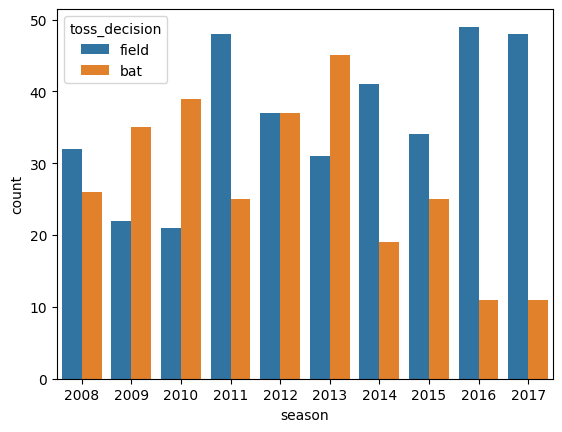

In [134]:
#analyse toss decision in each and every season
#The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable
#hue parameter when creating pairplots in seaborn to color plot aspects based on the values of a specific variable.
#This particular example creates a pairplot using every numerical variable in the data frame and colors the plot aspects based on the value of the team variable
sns.countplot(x='season',hue='toss_decision',data=df)#bat and field are two parameter in toss_decision
#from the plot we can conclude tht majority of toss winner in2016 choosed for field
#whereas mjority of winner in 2013 chose to bat

<Axes: >

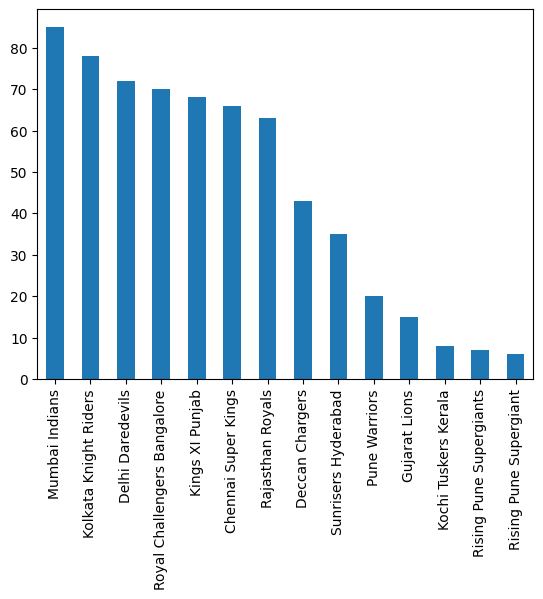

In [140]:
df['toss_winner'].value_counts().plot(kind='bar')

In [148]:
#total matches vs win of teams
teams=(df['team1'].value_counts()+df['team2'].value_counts()).reset_index()
teams.columns=['Team_Name','Matches_Played']
teams

,Team_Name,Matches_Played
0,CSK,131
1,DC,75
2,DD,147
3,GL,30
4,KKR,148
5,KPXI,148
6,KTK,14
7,MI,157
8,PW,46
9,RCB,152


In [149]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,MI,RPS,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,RPS,KPXI,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,RCB,DD,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,5/22/2016,DD,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,5/24/2016,GL,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,5/25/2016,SRH,KKR,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,5/27/2016,GL,SRH,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [158]:
df['winner']=df['winner'].map(Teams)

In [163]:
Winner_team=df['winner'].value_counts().reset_index()
Winner_team.columns=['Team_Name','No_of_wins']
Winner_team

,Team_Name,No_of_wins
0,MI,92
1,CSK,79
2,KKR,77
3,RCB,73
4,KPXI,70
5,RR,63
6,DD,62
7,SRH,42
8,DC,29
9,RPS,15


In [165]:
Table=teams.merge(Winner_team,left_on='Team_Name',right_on='Team_Name',how='inner')
Table
#this is how we r merging the team dtaframe that contains total matches played with winner_team data frame.

,Team_Name,Matches_Played,No_of_wins
0,CSK,131,79
1,DC,75,29
2,DD,147,62
3,GL,30,13
4,KKR,148,77
5,KPXI,148,70
6,KTK,14,6
7,MI,157,92
8,PW,46,12
9,RCB,152,73


In [169]:
#to calculate the %win
Table['%win']=Table['No_of_wins']/Table['Matches_Played']*100
Table

,Team_Name,Matches_Played,No_of_wins,%win
0,CSK,131,79,60.305344
1,DC,75,29,38.666667
2,DD,147,62,42.176871
3,GL,30,13,43.333333
4,KKR,148,77,52.027027
5,KPXI,148,70,47.297297
6,KTK,14,6,42.857143
7,MI,157,92,58.598726
8,PW,46,12,26.086957
9,RCB,152,73,48.026316


In [171]:
!pip install plotly


In [173]:
import plotly.offline as py
import plotly.graph_objs as go

In [177]:
trace1= go.Bar(
   x=Table['Team_Name'],
   y=Table['Matches_Played'],name='Total_Matches'
  )
trace2=go.Bar(
   x=Table['Team_Name'],
   y=Table['No_of_wins'],name='Matches_win'
  )

In [182]:
data=[trace1,trace2]
py.iplot(data)